In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import paddle.fluid as fluid

### Input data

In [2]:
#file='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df=pd.read_csv('./iris.data',header=None)

In [3]:
flowers_label=np.asarray(sorted([0,1,2]*50)).astype(np.int64) 
flowers_feature=df.iloc[:,:4].values 


index = np.arange(150)
np.random.shuffle(index)
flowers_label = flowers_label[index]
flowers_feature = flowers_feature[index]

### Split data

In [4]:
x_valid, x_train = flowers_feature[:50],flowers_feature[50:]
y_valid, y_train = flowers_label[:50],flowers_label[50:]

### paddle: define variables, fc

In [5]:
x = fluid.layers.data(name = 'x',shape = [None,4],dtype='float64')
y = fluid.layers.data(name = 'y',shape = [None,1],dtype='float64')

fc = fluid.layers.fc(x,size = 30,act = 'relu') 
y_pred = fluid.layers.fc(fc,size = 3,act = 'softmax') #softmax output - 3

# Cross entropy
cross_entropy = fluid.layers.cross_entropy(input = y_pred,label = y)
cost = fluid.layers.mean(cross_entropy)

# Accuracy
acc = fluid.layers.accuracy(input = y_pred,label=y)

# Optimizer
sgd = fluid.optimizer.SGD(learning_rate=0.01)
sgd.minimize(cost)


([inputs {
    parameter: "Grad"
    arguments: "fc_0.b_0@GRAD"
  }
  inputs {
    parameter: "LearningRate"
    arguments: "learning_rate_0"
  }
  inputs {
    parameter: "Param"
    arguments: "fc_0.b_0"
  }
  outputs {
    parameter: "ParamOut"
    arguments: "fc_0.b_0"
  }
  type: "sgd"
  attrs {
    name: "op_role"
    type: INT
    i: 2
  }
  attrs {
    name: "op_device"
    type: STRING
    s: ""
  }
  attrs {
    name: "op_role_var"
    type: STRINGS
    strings: "fc_0.b_0"
    strings: "fc_0.b_0@GRAD"
  }
  attrs {
    name: "op_namescope"
    type: STRING
    s: "/optimizer/"
  }
  attrs {
    name: "op_callstack"
    type: STRINGS
    strings: "  File \"c:\\python374\\lib\\site-packages\\paddle\\fluid\\framework.py\", line 2610, in append_op\n    attrs=kwargs.get(\"attrs\", None))\n"
    strings: "  File \"c:\\python374\\lib\\site-packages\\paddle\\fluid\\optimizer.py\", line 932, in _append_optimize_op\n    stop_gradient=True)\n"
    strings: "  File \"c:\\python374\\lib\\

### Run

In [6]:
use_cuda = False # GPU
place = fluid.CUDAPlace(0) if use_cuda else fluid.CPUPlace() # Point executor 
###executorcan take input program，and base on the feed map and fetch list to add and obtain parameters.
###close() close the executor，run(...) execute program。
exe = fluid.Executor(place)
main_program = fluid.default_main_program() # main program
test_program = main_program.clone(for_test=True) # clone for testing data

In [7]:
exe.run(fluid.default_startup_program()) # variable initialization
costs = []
val_costs = []
accuracys = []
val_accuracys = []
for i in range(500):
#     The first run, in main program
    cost_,acc_ = exe.run(program = main_program,feed = {'x':x_train,'y':y_train.reshape(-1,1)},fetch_list=[cost,acc])
#     Second run in testing program, validate
    val_cost,val_acc = exe.run(program=test_program,feed = {'x':x_valid,'y':y_valid.reshape(-1,1)},fetch_list=[cost,acc])
    
    costs.append(cost_[0])
    accuracys.append(acc_[0])
    val_costs.append(val_cost[0])
    val_accuracys.append(val_acc[0])
    print('----------%d-----------'%(i),cost_,acc_)
df = pd.DataFrame({'loss':costs,'accuracy':accuracys,'val_loss':val_costs,'val_accuracy':val_accuracys})

----------0----------- [2.74586059] [0.38]
----------1----------- [2.12622036] [0.38]
----------2----------- [1.73391004] [0.38]
----------3----------- [1.53458693] [0.38]
----------4----------- [1.4285304] [0.38]
----------5----------- [1.3603215] [0.38]
----------6----------- [1.30967416] [0.38]
----------7----------- [1.26958724] [0.38]
----------8----------- [1.23548256] [0.38]
----------9----------- [1.2066569] [0.38]
----------10----------- [1.18044549] [0.38]
----------11----------- [1.15612523] [0.38]
----------12----------- [1.13322204] [0.38]
----------13----------- [1.11217945] [0.39]
----------14----------- [1.0927843] [0.39]
----------15----------- [1.07492402] [0.39]
----------16----------- [1.05883251] [0.41]
----------17----------- [1.04434674] [0.39]
----------18----------- [1.0314407] [0.4]
----------19----------- [1.01914236] [0.42]
----------20----------- [1.00752132] [0.41]
----------21----------- [0.99634972] [0.41]
----------22----------- [0.98556682] [0.41]
----

----------191----------- [0.47596257] [0.92]
----------192----------- [0.47508492] [0.92]
----------193----------- [0.47421388] [0.92]
----------194----------- [0.47334721] [0.92]
----------195----------- [0.47248666] [0.92]
----------196----------- [0.47163063] [0.92]
----------197----------- [0.47078027] [0.92]
----------198----------- [0.46993455] [0.92]
----------199----------- [0.46909409] [0.92]
----------200----------- [0.46825836] [0.92]
----------201----------- [0.46742754] [0.92]
----------202----------- [0.4666015] [0.92]
----------203----------- [0.4657801] [0.92]
----------204----------- [0.4649638] [0.93]
----------205----------- [0.46415182] [0.93]
----------206----------- [0.46334462] [0.93]
----------207----------- [0.46254151] [0.93]
----------208----------- [0.46174312] [0.93]
----------209----------- [0.46094866] [0.93]
----------210----------- [0.46015883] [0.93]
----------211----------- [0.45937279] [0.93]
----------212----------- [0.45859126] [0.93]
----------213

----------384----------- [0.35923486] [0.95]
----------385----------- [0.35877935] [0.95]
----------386----------- [0.35832473] [0.95]
----------387----------- [0.35787154] [0.95]
----------388----------- [0.35742133] [0.95]
----------389----------- [0.35697225] [0.95]
----------390----------- [0.35652365] [0.95]
----------391----------- [0.3560759] [0.95]
----------392----------- [0.35562901] [0.95]
----------393----------- [0.35518297] [0.95]
----------394----------- [0.35473779] [0.95]
----------395----------- [0.35429395] [0.95]
----------396----------- [0.35385044] [0.95]
----------397----------- [0.35340777] [0.95]
----------398----------- [0.35296593] [0.95]
----------399----------- [0.35252492] [0.95]
----------400----------- [0.35208484] [0.95]
----------401----------- [0.35164593] [0.95]
----------402----------- [0.35120739] [0.95]
----------403----------- [0.35076967] [0.95]
----------404----------- [0.35033276] [0.95]
----------405----------- [0.34989666] [0.95]
----------4

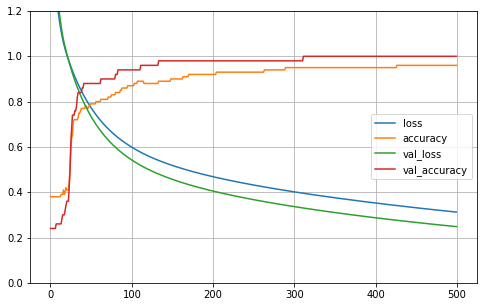

In [8]:
def plot_learning_curves(df):
    pd.DataFrame(df).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1.2)
    plt.show()
    
plot_learning_curves(df)